<a href="https://colab.research.google.com/github/piyush9868/NASA-Turbofan/blob/main/Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = pd.read_csv('/content/drive/My Drive/train_FD001.txt', names=["unit number","time in cycles","OS1","OS2","OS3","T2","T24","T30","T50","P2","P15","P30","Nf","Nc","epr","Ps30","phi","NRf","NRc","BPR","farB","htBleed","Nf_dmd","PCNfR_dmd","W31","W32","var25","var26"] , sep = " ")


In [ ]:
file

,unit number,time in cycles,OS1,OS2,OS3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,var25,var26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
#check if there is any null values 

In [ ]:
file.isnull().sum()


unit number           0
time in cycles        0
OS1                   0
OS2                   0
OS3                   0
T2                    0
T24                   0
T30                   0
T50                   0
P2                    0
P15                   0
P30                   0
Nf                    0
Nc                    0
epr                   0
Ps30                  0
phi                   0
NRf                   0
NRc                   0
BPR                   0
farB                  0
htBleed               0
Nf_dmd                0
PCNfR_dmd             0
W31                   0
W32                   0
var25             20631
var26             20631
dtype: int64

In [ ]:
#number of null values in columns

In [ ]:
#Drop var25, var26
file.drop(columns=["var25","var26"] , inplace=True)

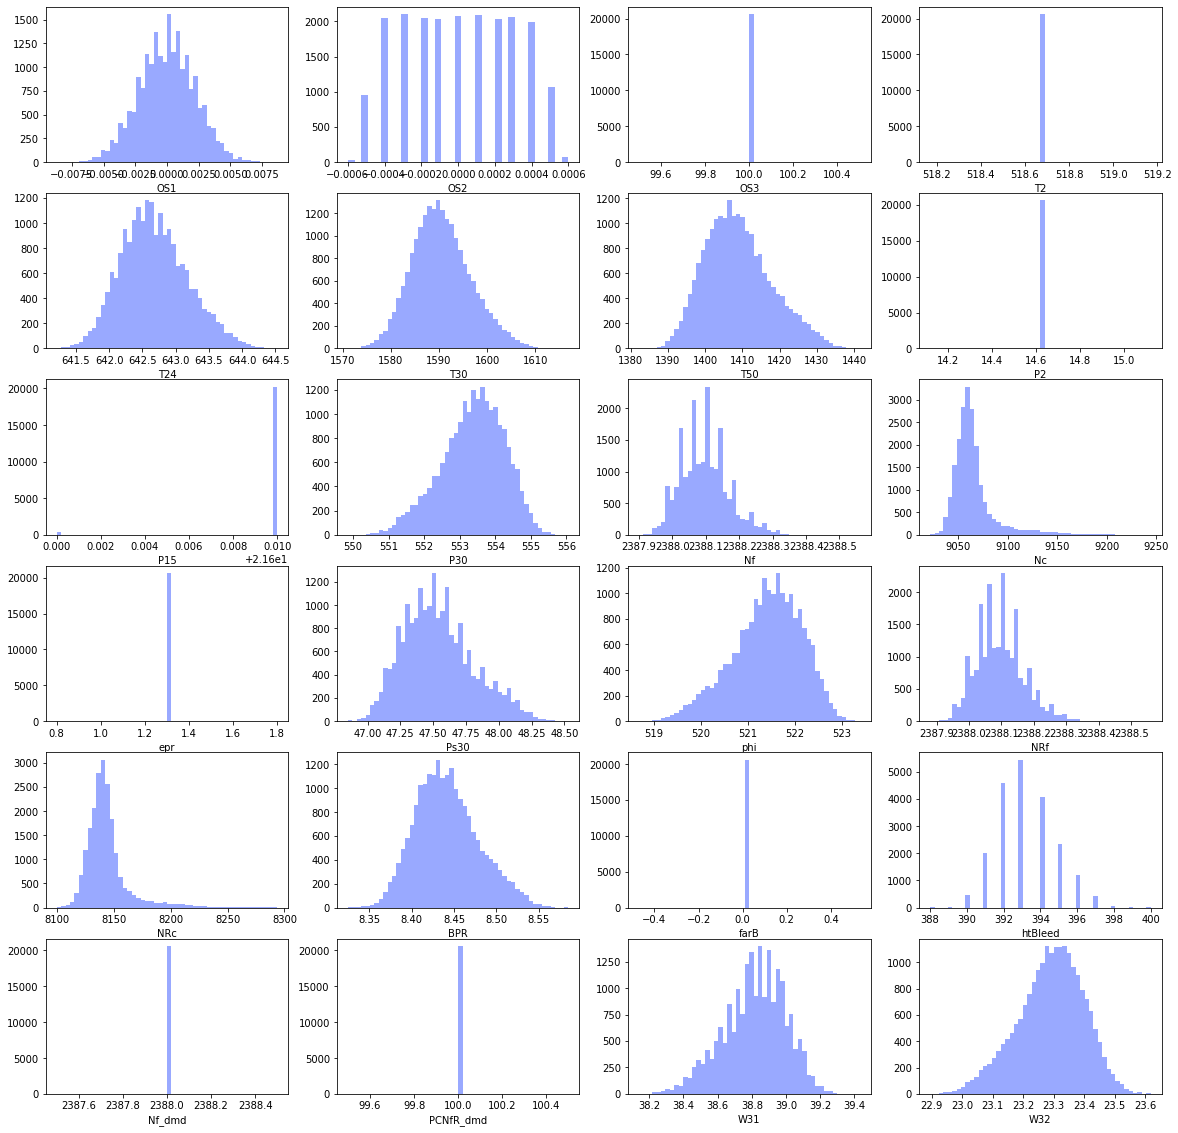

In [ ]:
j = 1
plt.figure(figsize=(20,20))

for i in range(2 , len(file.columns)):
    
    plt.subplot(6, 4, j)
    sns.distplot(file.iloc[: , i] , kde=0 , color="#0029FF")
    
    j += 1
plt.savefig("hist.png")

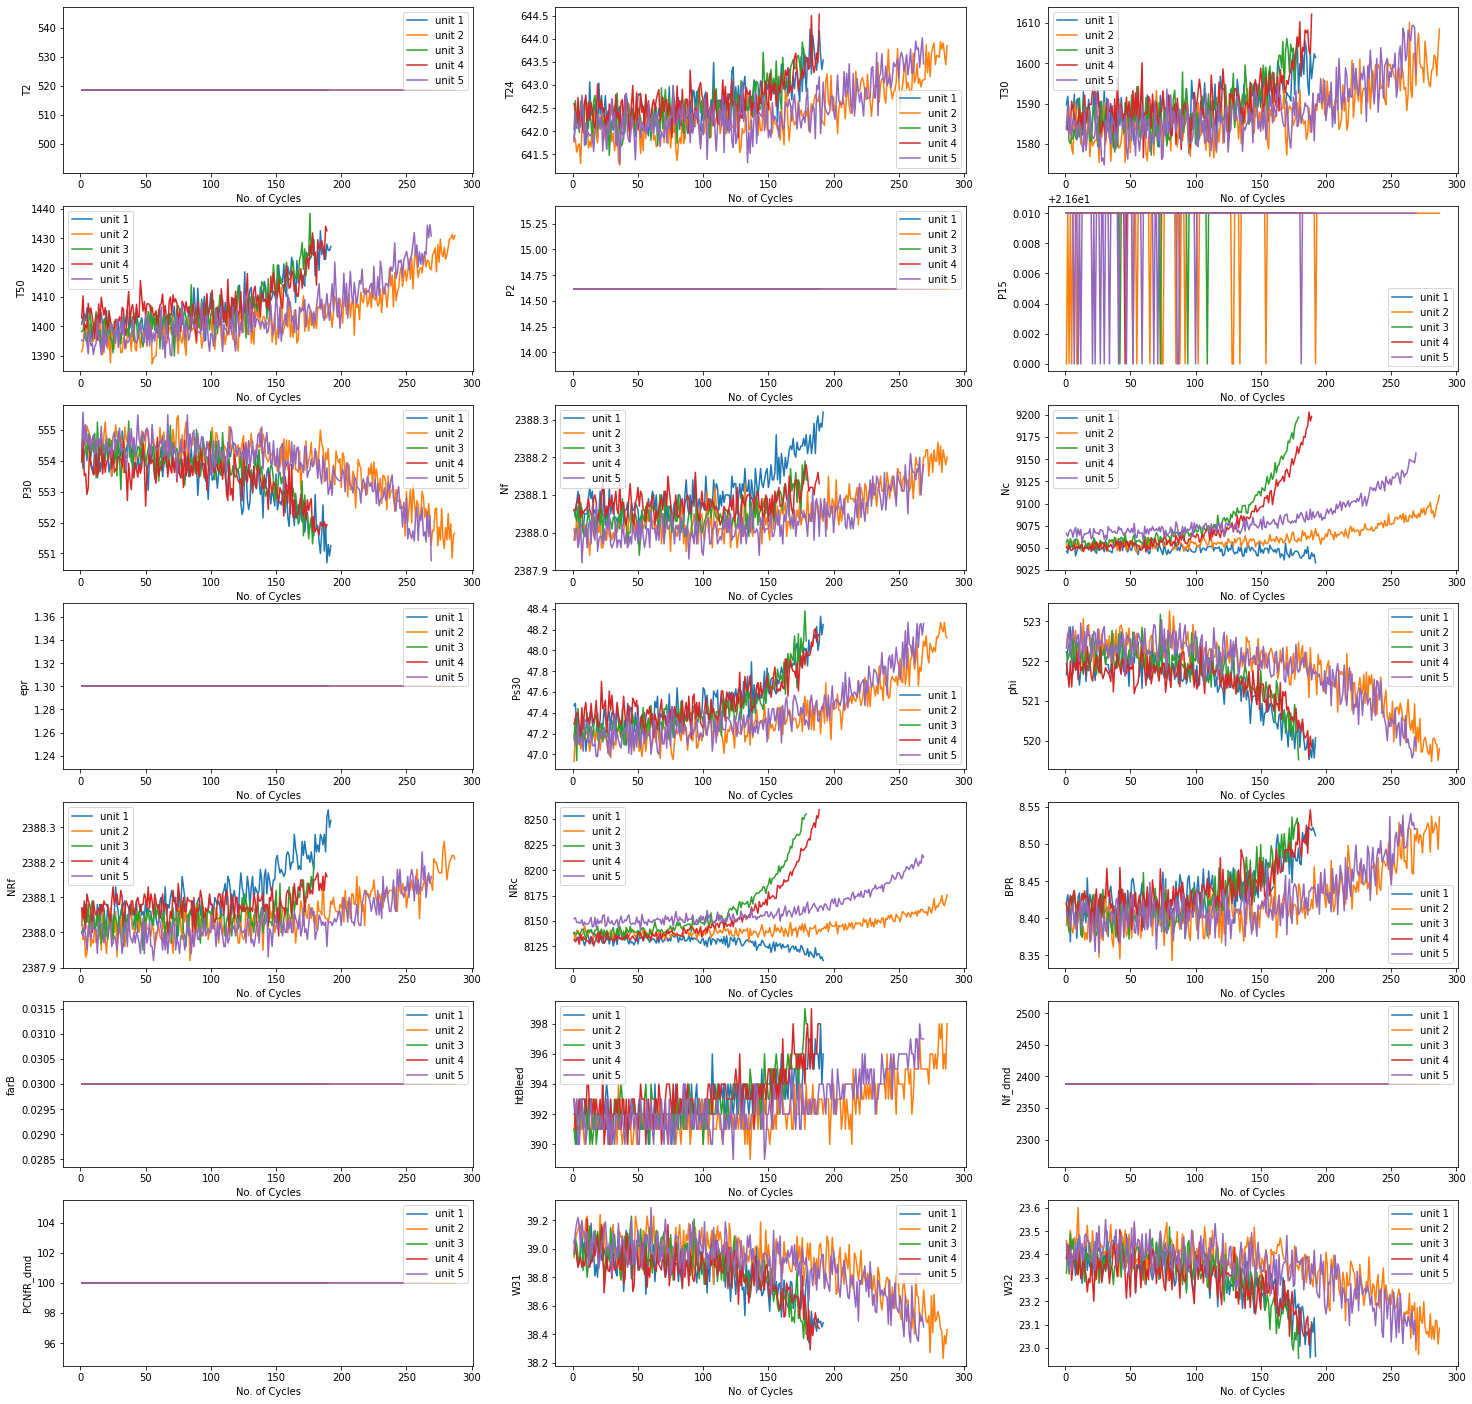

In [ ]:
#color_codes = ["#022BFF" , "#FF1102" , "#F4FF02" , "#0FFF02" , "#FF0243" , "#FF02FE"]
plt.figure(figsize=(25,25))
j = 1
for i in range(5,len(file.columns)):
    plt.subplot(7,3,j)
    for k in range(1,6):

      plt.plot(file.groupby("unit number").get_group(k)["time in cycles"] , file.groupby("unit number").get_group(k).iloc[:,i] , label = "unit " + str(k))

    plt.ylabel(file.columns[i])
    plt.xlabel("No. of Cycles") 
    plt.legend()
    #plt.show()
    j += 1
    

In [ ]:
(file.groupby("unit number").get_group(1))

,unit number,time in cycles,OS1,OS2,OS3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


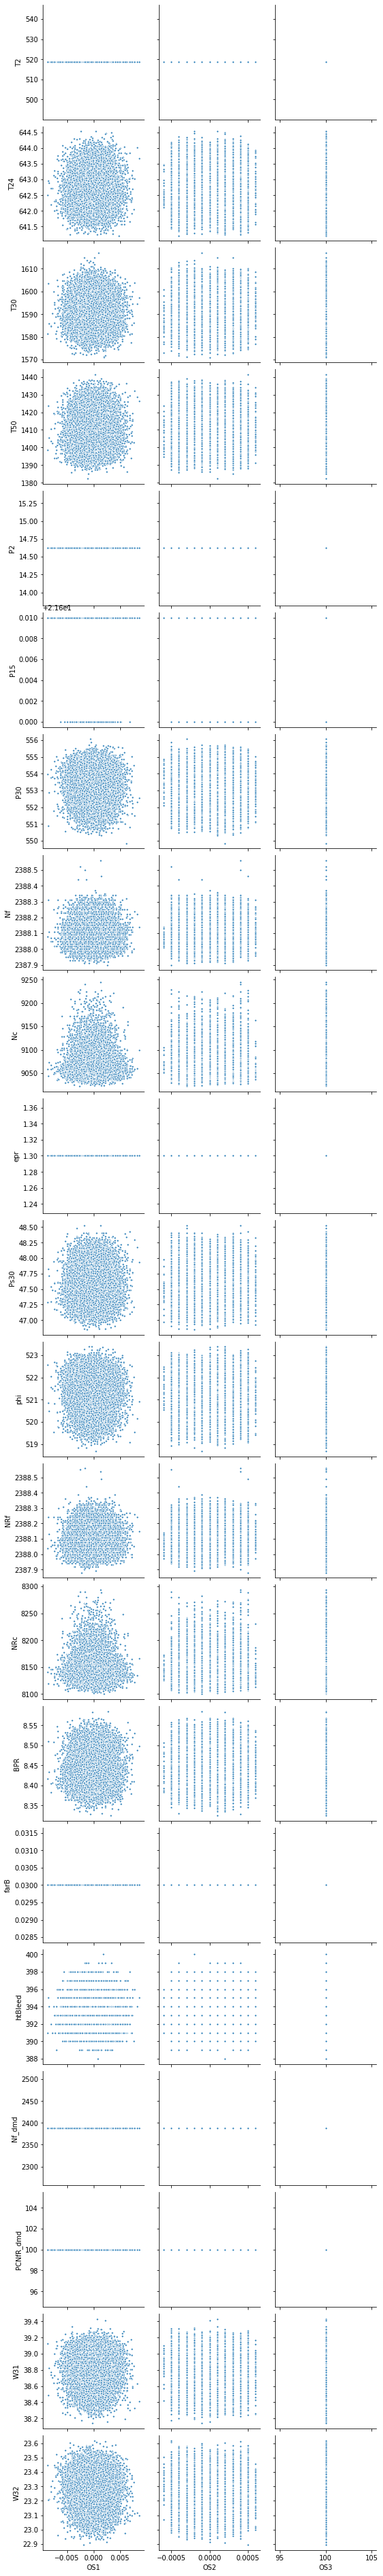

In [ ]:
sns.pairplot(data = file , y_vars = list(file.columns[5:]) , x_vars = list(file.columns[2:5]) , markers = '.' )


In [ ]:
#Parameters that donot change with change in operating conditions shall be dropped
params_drop = ["OS3" , "PCNfR_dmd" , "Nf_dmd" , "farB" , "epr" , "P2" , "T2"]
file.drop(columns = params_drop , inplace =True)

In [ ]:
#Adding RUL column
file["RUL"] = file.groupby(['unit number'])["time in cycles"].transform(max) - file["time in cycles"]

In [ ]:
file

,unit number,time in cycles,OS1,OS2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [ ]:
#correlation of remaining useful life (RUL) with sensor measurements
RUL_corr = file.corr().iloc[2:19,-1]

Text(0, 0.5, 'Sensor measurements')

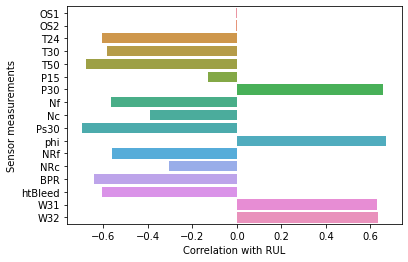

In [ ]:

sns.barplot(RUL_corr , RUL_corr.index)
plt.xlabel("Correlation with RUL")
plt.ylabel("Sensor measurements")

In [ ]:
file.drop(columns = ["OS1" , "OS2" , "P15"] , inplace=True)

In [ ]:
#Making windows
def cond(x):
  if (x>105):
    return 2
  elif ((x>20) & (x<=105)):
    return 1
  elif (x<=20):
    return 0
file["window"] = file["RUL"].map(cond)

In [ ]:
file

,unit number,time in cycles,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL,window
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,2
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,2
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,2
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,2
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,0
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,0
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,0
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,0


In [ ]:
window_decoder = {2:"Good",1:"Average",0:"Poor"}

In [ ]:
window_decoder[2]

'Good'

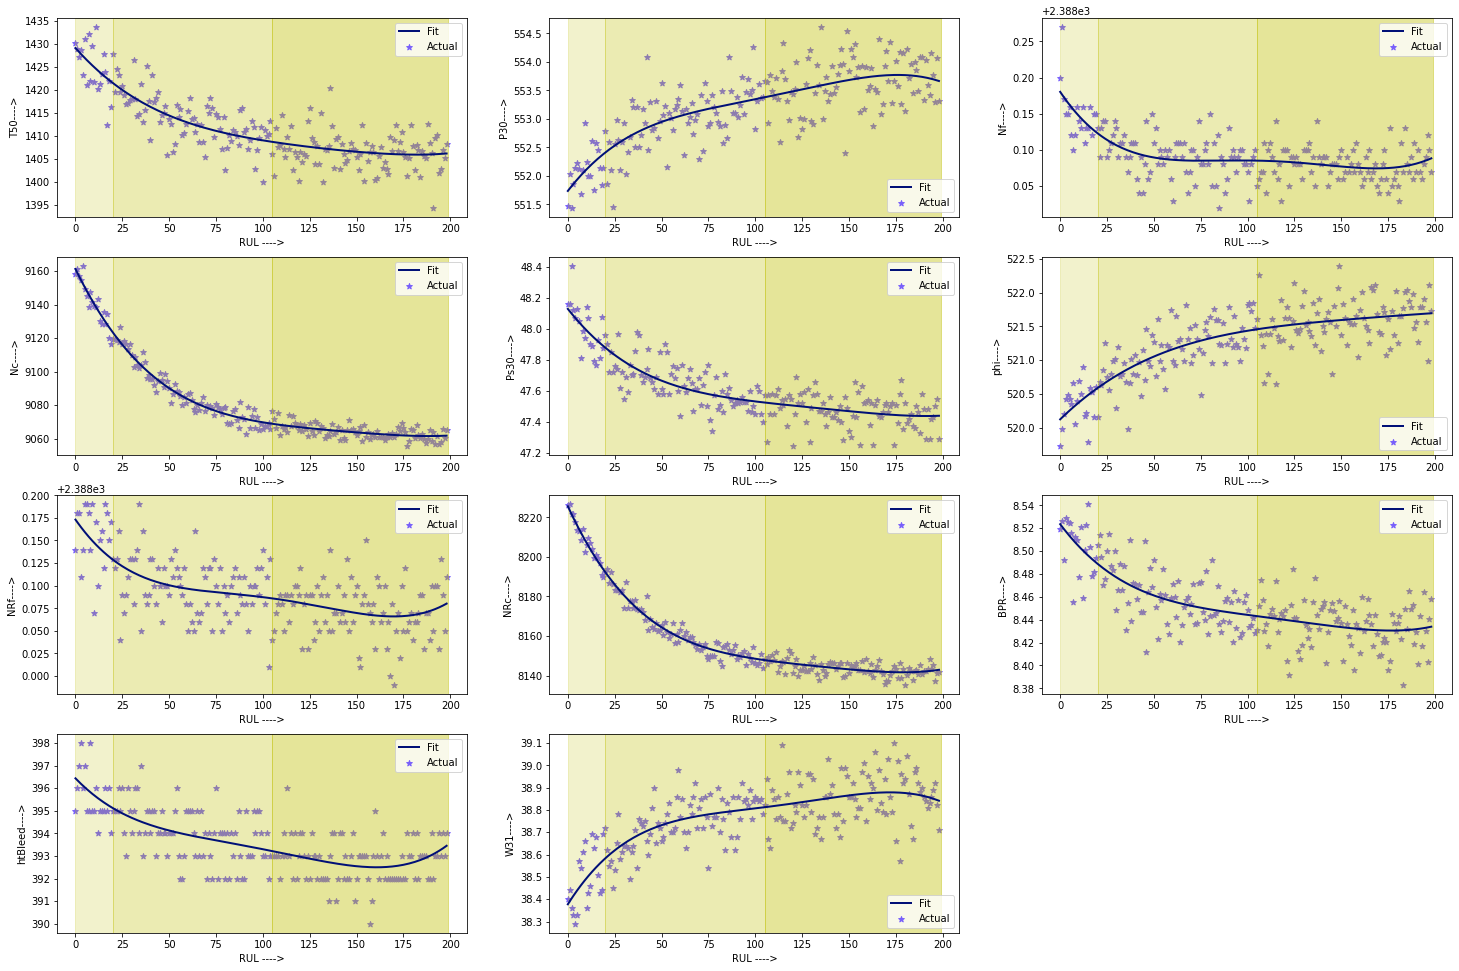

In [ ]:
#Change in parameters for maximum lasting turbofan with remaining useful life
#median of max is used for plotting
#color_codes = ["#022BFF" , "#FF1102" , "#F4FF02" , "#0FFF02" , "#FF0243" , "#FF02FE"]
# Good, Poor and then Average
plt.figure(figsize=(25,30))
j = 1
for i in range(4,len(file.columns)-3):
    plt.subplot(7,3,j)
    #to mention the regions of a particular window
    plt.axvspan(0,20 ,alpha = 0.2 ,  color = "y")
    plt.axvspan(20 , 105 ,alpha = 0.3 ,  color = "y")
    plt.axvspan(105 , file.groupby("unit number")["time in cycles"].max().median() ,alpha = 0.4 ,  color = "y")
    plt.scatter(file.groupby("unit number").get_group(68)["RUL"] , file.groupby("unit number").get_group(68).iloc[:,i] , color = "#775EFB" , 
                label = "Actual" , marker = '*')
    p = np.polyval(np.polyfit(file.groupby("unit number").get_group(68)["RUL"] , file.groupby("unit number").get_group(68).iloc[:,i] , deg=4) ,  
                   file.groupby("unit number").get_group(68)["RUL"])
    plt.plot(file.groupby("unit number").get_group(68)["RUL"] , p , color = "#011077" ,  label = "Fit" , linewidth = 2.0 )
    plt.ylabel(file.columns[i] + "---->")
    plt.xlabel("RUL ---->") 
    plt.legend()
    #plt.grid(linestyle = "--")
    j += 1  
plt.savefig("per_window.png")
    

In [ ]:
# x = pd.DataFrame(file.groupby("unit number")["time in cycles"].max())
# x.loc[x["time in cycles"] == 199].index

In [ ]:
file


,unit number,time in cycles,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL,window
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,2
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,2
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,2
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,2
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,0
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,0
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,0
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,0


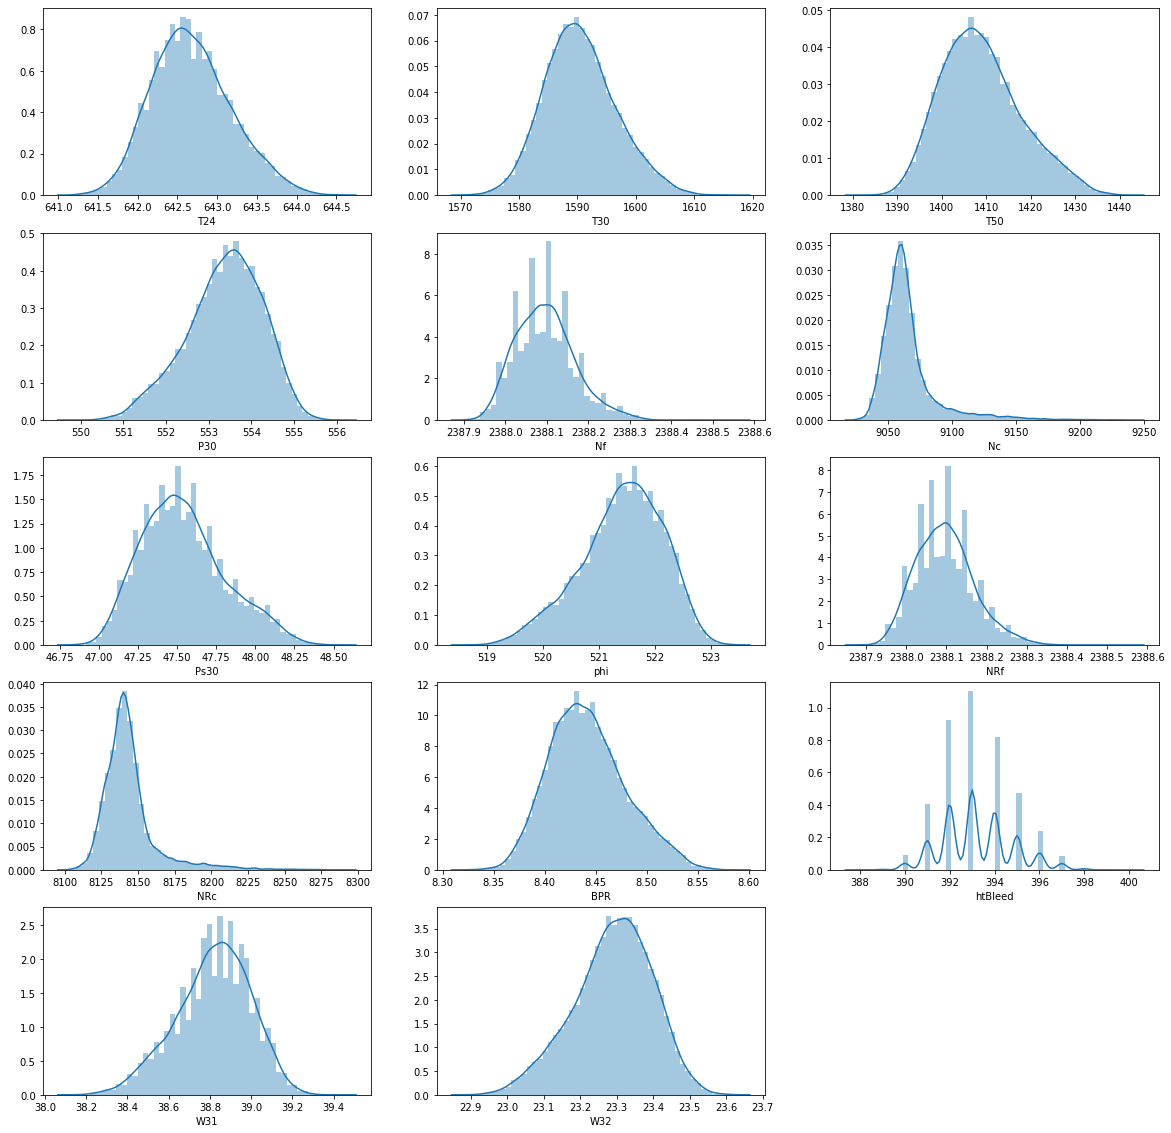

In [ ]:
k = 1
plt.figure(figsize=(20,20))
for i in range(2 , len(file.columns) - 2):
  plt.subplot(5 , 3 , k)
  sns.distplot(file.iloc[: , i])
  k += 1


plt.savefig("hist.png")

In [ ]:
print(file.loc[file["window"] == 0 , "window"].count())
print(file.loc[file["window"] == 1 , "window"].count())
print(file.loc[file["window"] == 2 , "window"].count())

2100
8500
10031


In [ ]:
#initializing the dependent and independent vars
X = file.iloc[: , 2:-2]
Y = file.window


In [ ]:
#Scaling the data
X_scaled = StandardScaler().fit_transform(X)


In [ ]:
X_scaled

array([[-1.72172539, -0.13425518, -0.92593596, ..., -0.78170979,
         1.34849274,  1.19442705],
       [-1.06177971,  0.21152849, -0.64372587, ..., -0.78170979,
         1.01652793,  1.23692196],
       [-0.66181262, -0.41316559, -0.52595315, ..., -2.07309423,
         0.73989059,  0.50342281],
       ...,
       [ 1.47801126,  1.94697106,  2.13837684, ...,  3.09244354,
        -2.08181033, -3.29248147],
       [ 1.09804254,  2.40366648,  1.95505138, ...,  1.15536688,
        -2.91172236, -2.08507166],
       [ 2.33794049,  1.60771161,  2.57835793, ...,  1.8010591 ,
        -2.46910261, -2.19408035]])

In [ ]:
#splitting the dataset into training and validation datasets
X_train , X_test , y_train , y_test = train_test_split(X_scaled , Y , train_size = 0.8 , random_state = 100)

In [ ]:
#initializing the basic logisctic regression model and fitting the data
model_1 = LogisticRegression(multi_class="ovr")
model_1.fit(X_train , y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting the outcome variable for validation dataset
y_pred = model_1.predict(X_test)

In [ ]:
y_pred

array([1, 2, 2, ..., 2, 2, 1], dtype=int64)

In [ ]:
#storing the predicted and actual values in a dataframe
def draw_pred_df(model , X_test_sample , y_test_sample):
    pred_prob_y = model.predict_proba(X_test_sample)
    pred_prob_y_df = pd.DataFrame(pred_prob_y)
    pred_prob_y_df.rename(columns={0:"prob_0" , 1:"prob_1" , 2:"prob_2" } , inplace=True)
    y_test_df = pd.DataFrame(y_test_sample)
    y_test_df.reset_index(inplace = True)
    y_test_df.rename(columns = {"window" : "actual"} , inplace = True)
    y_test_df["pred"] = model.predict(X_test_sample)
    pred_df = y_test_df.join(pred_prob_y_df)
    return pred_df

pred_df_1 =draw_pred_df(model_1 , X_test , y_test)
pred_df_1

,index,actual,pred,prob_0,prob_1,prob_2
0,11028,2,1,6.214002e-04,0.584074,0.415304
1,3350,2,2,1.120627e-08,0.186224,0.813776
2,7897,2,2,7.205156e-08,0.244935,0.755065
3,4925,2,2,3.315585e-06,0.333153,0.666844
4,6368,1,1,6.851109e-02,0.896622,0.034867
...,...,...,...,...,...,...
4122,3838,1,2,5.175084e-04,0.439501,0.559981
4123,17629,2,2,2.348414e-06,0.344006,0.655991
4124,854,2,2,9.870030e-09,0.205220,0.794780
4125,15971,2,2,2.227643e-05,0.357061,0.642917


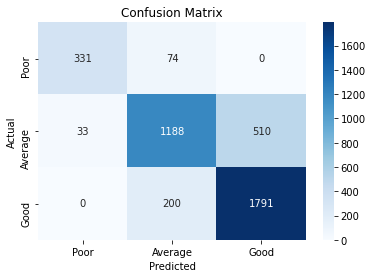

In [ ]:
def draw_cm(actual , predicted):
  cm = metrics.confusion_matrix(actual , predicted)
  cmap = np.random.choice(["YlGnBu" , "BuPu" , "Blues" , "Greens"])
  sns.heatmap(cm , annot=True , fmt = ".0f" , cmap = cmap , xticklabels=["Poor" , "Average" , "Good"] , yticklabels=["Poor" , "Average" , "Good"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()
  return cm

cm_1 = draw_cm(pred_df_1.actual , pred_df_1.pred)

In [ ]:
print(metrics.classification_report(pred_df_1.actual , pred_df_1.pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       405
           1       0.81      0.69      0.74      1731
           2       0.78      0.90      0.83      1991

    accuracy                           0.80      4127
   macro avg       0.83      0.80      0.81      4127
weighted avg       0.81      0.80      0.80      4127



In [ ]:
model_1.score(X_test , y_test)

0.8020353767870123

In [ ]:
#Decision Tree

In [ ]:
model_2 = DecisionTreeClassifier(criterion="gini" , max_depth = 10)
model_2.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_df_2 =draw_pred_df(model_2 , X_test , y_test)
pred_df_2

,index,actual,pred,prob_0,prob_1,prob_2
0,11028,2,1,0.000000,0.576271,0.423729
1,3350,2,2,0.000000,0.001855,0.998145
2,7897,2,2,0.000000,0.055000,0.945000
3,4925,2,2,0.000000,0.123894,0.876106
4,6368,1,1,0.011127,0.976356,0.012517
...,...,...,...,...,...,...
4122,3838,1,2,0.000000,0.119342,0.880658
4123,17629,2,2,0.000000,0.235294,0.764706
4124,854,2,2,0.000000,0.001855,0.998145
4125,15971,2,2,0.000000,0.182857,0.817143


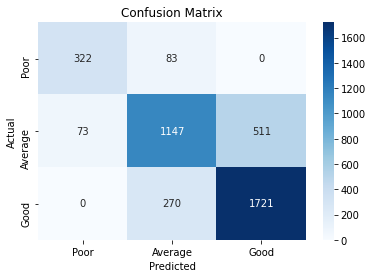

In [ ]:
cm_2 = draw_cm(pred_df_2.actual , pred_df_2.pred)

In [ ]:
print(metrics.classification_report(pred_df_2.actual , pred_df_2.pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       405
           1       0.76      0.66      0.71      1731
           2       0.77      0.86      0.82      1991

    accuracy                           0.77      4127
   macro avg       0.78      0.77      0.78      4127
weighted avg       0.77      0.77      0.77      4127



In [ ]:
model_2.score(X_test , y_test)

0.7729585655439787

In [ ]:
model_params = {"criterion" : ["gini" , "entropy"] , "max_depth" : range(10,20)}
model_3 = GridSearchCV(DecisionTreeClassifier() , param_grid=model_params , cv=10)
model_3.fit(X_train , y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
model_3.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [ ]:
model_4 = DecisionTreeClassifier(criterion="entropy" , max_depth = 10)
model_4.fit(X_train , y_train)
pred_df_4 =draw_pred_df(model_4 , X_test , y_test)
pred_df_4

,index,actual,pred,prob_0,prob_1,prob_2
0,11028,2,1,0.000000,0.706294,0.293706
1,3350,2,2,0.000000,0.071429,0.928571
2,7897,2,2,0.000000,0.000000,1.000000
3,4925,2,2,0.000000,0.202703,0.797297
4,6368,1,1,0.004762,0.980952,0.014286
...,...,...,...,...,...,...
4122,3838,1,2,0.000000,0.219298,0.780702
4123,17629,2,1,0.000000,0.645570,0.354430
4124,854,2,2,0.000000,0.000000,1.000000
4125,15971,2,2,0.000000,0.321764,0.678236


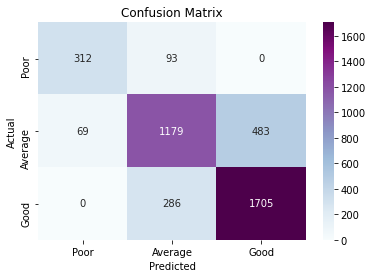

In [ ]:
cm_4 = draw_cm(pred_df_4.actual , pred_df_4.pred)

In [ ]:
print(metrics.classification_report(pred_df_4.actual , pred_df_4.pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       405
           1       0.76      0.68      0.72      1731
           2       0.78      0.86      0.82      1991

    accuracy                           0.77      4127
   macro avg       0.78      0.77      0.78      4127
weighted avg       0.77      0.77      0.77      4127



In [ ]:
model_4.score(X_test , y_test)

0.7744124061061304

In [ ]:
#AdaBoost

In [ ]:
model_5 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy" , max_depth = 10) , n_estimators=50)
model_5.fit(X_train , y_train)
pred_df_5 = draw_pred_df(model_5 , X_test , y_test)
pred_df_5

,index,actual,pred,prob_0,prob_1,prob_2
0,11028,2,2,1.060455e-12,0.303979,6.960206e-01
1,3350,2,2,3.258240e-16,0.300692,6.993081e-01
2,7897,2,2,3.306965e-16,0.290566,7.094337e-01
3,4925,2,1,4.729547e-15,0.652961,3.470393e-01
4,6368,1,1,1.121297e-07,1.000000,1.891878e-09
...,...,...,...,...,...,...
4122,3838,1,2,4.266081e-13,0.383099,6.169012e-01
4123,17629,2,1,4.526586e-16,0.540055,4.599455e-01
4124,854,2,2,3.886410e-16,0.184771,8.152293e-01
4125,15971,2,2,4.066969e-15,0.201963,7.980372e-01


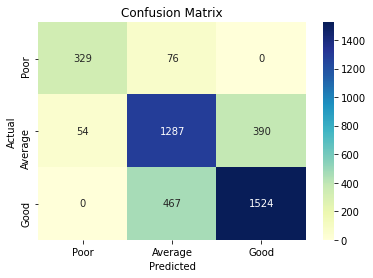

In [ ]:
cm_5 = draw_cm(pred_df_5.actual , pred_df_5.pred)

In [ ]:
print(metrics.classification_report(pred_df_5.actual , pred_df_5.pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       405
           1       0.70      0.74      0.72      1731
           2       0.80      0.77      0.78      1991

    accuracy                           0.76      4127
   macro avg       0.79      0.77      0.78      4127
weighted avg       0.76      0.76      0.76      4127



In [ ]:
model_5.score(X_test , y_test)

0.7608432275260479

In [ ]:
#Gradient Boosting

In [ ]:
model_6 = GradientBoostingClassifier(n_estimators=200, max_depth = 10)
model_6.fit(X_train , y_train)
pred_df_6 = draw_pred_df(model_6 , X_test , y_test)
pred_df_6


,index,actual,pred,prob_0,prob_1,prob_2
0,11028,2,1,0.000074,0.533138,0.466788
1,3350,2,2,0.000005,0.002462,0.997533
2,7897,2,2,0.000008,0.040989,0.959004
3,4925,2,2,0.000009,0.081119,0.918871
4,6368,1,1,0.000036,0.999057,0.000908
...,...,...,...,...,...,...
4122,3838,1,2,0.000025,0.215730,0.784246
4123,17629,2,2,0.000016,0.293068,0.706916
4124,854,2,2,0.000003,0.000813,0.999184
4125,15971,2,2,0.000007,0.101829,0.898164


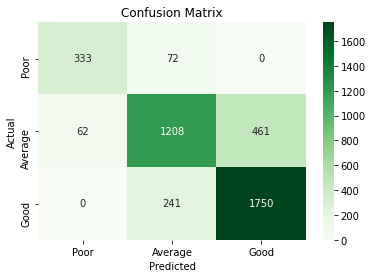

In [ ]:
cm_6 = draw_cm(pred_df_6.actual , pred_df_6.pred)

In [ ]:
print(metrics.classification_report(pred_df_6.actual , pred_df_6.pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       405
           1       0.79      0.70      0.74      1731
           2       0.79      0.88      0.83      1991

    accuracy                           0.80      4127
   macro avg       0.81      0.80      0.80      4127
weighted avg       0.80      0.80      0.80      4127



In [ ]:
model_6.score(X_test , y_test)

0.7974315483401987

In [ ]:
model_6.score(X_train , y_train)


1.0

Random Forest


In [ ]:

model_7 = RandomForestClassifier(n_estimators=200 , max_depth = 8)
model_7.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_df_7 = draw_pred_df(model_7 , X_test , y_test)
pred_df_7

,index,actual,pred,prob_0,prob_1,prob_2
0,11028,2,1,0.016235,0.679175,0.304590
1,3350,2,2,0.000000,0.031819,0.968181
2,7897,2,2,0.000000,0.110200,0.889800
3,4925,2,2,0.000152,0.257585,0.742264
4,6368,1,1,0.040098,0.921441,0.038461
...,...,...,...,...,...,...
4122,3838,1,2,0.002974,0.409607,0.587418
4123,17629,2,2,0.000000,0.332584,0.667416
4124,854,2,2,0.000000,0.033755,0.966245
4125,15971,2,2,0.000434,0.326343,0.673223


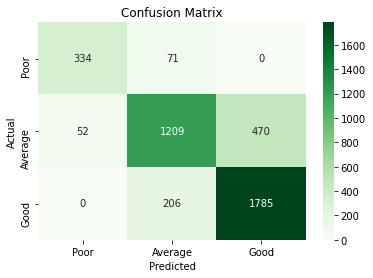

In [ ]:
cm_7 = draw_cm(pred_df_7.actual , pred_df_7.pred)

In [ ]:
print(metrics.classification_report(pred_df_7.actual , pred_df_7.pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       405
           1       0.81      0.70      0.75      1731
           2       0.79      0.90      0.84      1991

    accuracy                           0.81      4127
   macro avg       0.82      0.81      0.81      4127
weighted avg       0.81      0.81      0.80      4127



In [ ]:
(model_7.score(X_test , y_test) , 2)

(0.8063968984734674, 2)